# Bench the Alep model in parallel

In [1]:
%run benchmark.ipynb

## Parallel computing interface

In [2]:
from IPython.parallel import Client

In [3]:
c = Client()
v = c.load_balanced_view()

## Benchmark for various numbers of plants, phyto-elements by leaf, initial number of lesions by leaf

In [4]:
%px from pympler.asizeof import asizeof
%px mo=1024*1024.

def memory_bench(plant, phy, lesion):
    repeat = 1
    from IPython.kernel.zmq.datapub import publish_data
    t, g = measure(plant,phy,lesion)
    mem = asizeof(g)/mo
    publish_data(dict(plant=plant, phytomer=phy,lesion=lesion, memory=mem))


In [5]:
# results
async_results = []
%px %run benchmark.ipynb

In [7]:
for plant in (1,): #(1,2,5):
        for phy in (4,5,6): #(1,3,5):
            for les in (1,):#(1,5,10):
                ar = v.apply_async(memory_bench, plant, phy,les)
                async_results.append(ar)
c.wait(async_results)
results = [ar.data for ar in async_results]

mmerge(results)

In [13]:
#async_results
results = [ar.data for ar in async_results]
results = [r for r in results if r]
#results
mmerge(results)
results

[{'lesion': 1, 'memory': 22.158042907714844, 'phytomer': 1, 'plant': 1},
 {'lesion': 2, 'memory': 20.740280151367188, 'phytomer': 1, 'plant': 1},
 {'lesion': 3, 'memory': 34.33277893066406, 'phytomer': 1, 'plant': 1},
 {'lesion': 1, 'memory': 42.96612548828125, 'phytomer': 3, 'plant': 1},
 {'lesion': 2, 'memory': 97.05835723876953, 'phytomer': 3, 'plant': 1},
 {'lesion': 1, 'memory': 51.774009704589844, 'phytomer': 1, 'plant': 2},
 {'lesion': 2, 'memory': 106.9139633178711, 'phytomer': 1, 'plant': 2},
 {'lesion': 3, 'memory': 142.03794860839844, 'phytomer': 1, 'plant': 2},
 {'lesion': 1, 'memory': 100.18649291992188, 'phytomer': 3, 'plant': 2},
 {'lesion': 1, 'memory': 82.1990966796875, 'phytomer': 1, 'plant': 3},
 {'lesion': 2, 'memory': 165.73113250732422, 'phytomer': 1, 'plant': 3},
 {'lesion': 3, 'memory': 139.4386215209961, 'phytomer': 1, 'plant': 3}]

In [20]:
df = pd.DataFrame.from_csv('bench_mem.txt',sep=',',index_col=None)
df.sort(['plant', 'phytomer','lesion'])

plant  phytomer  lesion      memory
3       1         1       1   22.158043
4       1         1       2   20.740280
5       1         1       3   34.332779
0       1         1       5   53.732018
1       1         1      10   71.079529
6       1         3       1   42.966125
7       1         3       2   97.058357
2       1         5       1   78.974052
8       2         1       1   51.774010
9       2         1       2  106.913963
10      2         1       3  142.037949
11      2         3       1  100.186493
12      3         1       1   82.199097
13      3         1       2  165.731133
14      3         1       3  139.438622

[15 rows x 4 columns]

phytomer
1           Axes(0.125,0.125;0.775x0.775)
3           Axes(0.125,0.125;0.775x0.775)
5           Axes(0.125,0.125;0.775x0.775)
dtype: object

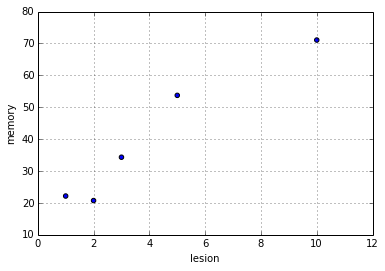

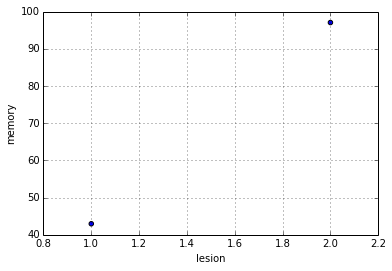

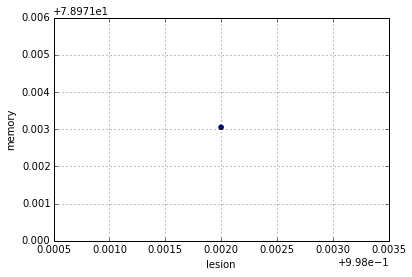

In [37]:
%matplotlib inline

#df['ppl']=df.ppl
#df.sort('ppl')
#df.plot(x='ppl',y='time',kind='scatter')
df[df.plant==1].groupby('phytomer').plot(x='lesion',y='memory',style='o-',kind='scatter')

In [103]:
#dfl = df.groupby('lesion')
#dfp = df.groupby('plant')
dfp1= df[df.lesion==1]
dfp1.time/dfp1.plant


0      52.616385
1      75.555154
12    233.297552
13    240.503890
14    223.256205
30    248.206798
31    204.005225
dtype: float64

In [129]:
%qtconsole

In [10]:
t,g=measure(1,1,1)

!!!!!!!!!!!WARNING !!!!!!!!!!: Septo3DSplash class is deprecated, and will be remove in future verions, use alinea.septo3d.dispersion.alep_interfaces instead


In [24]:
len(g.Trunk(1,Scale=4))

14

In [25]:
from sys import getsizeof
g.nbyte

64

In [26]:
8000./60

133.33333333333334

In [42]:
les=g.properties()['lesions']
g.nb_vertices(scale=4)

168

In [48]:
from pympler.asizeof import asizeof
mo=1024*1024
asizeof(g)*9.53674316*10**-7

23.164024343159838

In [44]:
mo=1024*1024

1048576

In [47]:
_*9.53674316*10**-7

0.999999999574016

In [ ]:
g, domain_area = adel_sample(nb_sect=nb_phyelts, d=1000, p=nb_plants)

In [6]:
%run benchmark.ipynb

In [7]:
minit(); msave()